In [1]:
!pip install pyod
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install suod
!pip install matplotlib

  Using cached pyod-2.0.5-py3-none-any.whl.metadata (46 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached matplotlib-3.10.3-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached pyod-2.0.5-py3-none-any.whl (200 kB)
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------------------------------- -- 2.6/2.8 MB 25.1 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 12.7 MB/s eta 0:00:00
   ----------------------------------

In [33]:
!pip install tabulate

In [2]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split

file = "../results/processed_data/opcua_rose_balanced.csv"
data = pd.read_csv(file)

# eliminar las columnas que no son numéricas
# data = data.select_dtypes(include=["float64", "int64", "int32"])

# quitar las ultimas 2 columnas
# data = data.iloc[:, :-1]
data = data.drop(columns=["service_errors", "status_errors"])
data

,src_port,dst_port,srv_count,same_srv_rate,f_pktTotalCount,b_pktTotalCount,label
0,-1.877297,-0.003048,-0.820244,0.028222,-0.003048,-0.673012,1
1,-1.522797,-0.003048,1.074629,0.028222,-0.003048,-0.673012,1
2,-0.697821,-0.003048,0.549289,0.028222,-0.003048,-0.673012,1
3,-1.693009,-0.003048,0.709152,0.028222,-0.003048,-0.673012,1
4,-0.650728,-0.003048,0.688125,0.028222,-0.003048,-0.673012,1
...,...,...,...,...,...,...,...
107628,0.339449,-2.007216,-1.147787,1.046293,-0.033896,1.495133,0
107629,0.020334,0.419700,-1.244208,-1.079996,-0.690815,1.478193,0
107630,0.694480,-0.562511,-1.201893,-0.027320,0.331470,1.463652,0
107631,1.243298,-0.915401,-1.174724,0.518939,0.340136,1.491247,0


In [67]:
data.describe()

,src_port,dst_port,srv_count,same_srv_rate,f_pktTotalCount,b_pktTotalCount,label
count,107633.000000,107633.000000,107633.000000,107633.000000,107633.000000,107633.000000,107633.000000
mean,0.162510,0.000665,-0.328381,-0.015137,0.001616,0.400846,0.502430
std,0.971925,1.112859,1.036765,1.373826,1.494685,1.079451,0.499996
min,-3.223420,-3.089353,-2.093615,-37.273986,-2.933165,-0.700875,0.000000
25%,-0.346965,-0.003048,-1.249654,0.028222,-0.003048,-0.673012,0.000000
50%,0.348654,-0.003048,-1.099705,0.028222,-0.003048,-0.673012,1.000000
75%,0.838057,-0.003048,0.760045,0.030078,-0.003048,1.485706,1.000000
max,3.038962,327.654983,3.212627,3.497810,328.066886,1.555383,1.000000


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107633 entries, 0 to 107632
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   src_port         107633 non-null  float64
 1   dst_port         107633 non-null  float64
 2   srv_count        107633 non-null  float64
 3   same_srv_rate    107633 non-null  float64
 4   f_pktTotalCount  107633 non-null  float64
 5   b_pktTotalCount  107633 non-null  float64
 6   label            107633 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 5.7 MB


In [69]:
# cuantos hay en label
data["label"].value_counts()

label
1    54078
0    53555
Name: count, dtype: int64

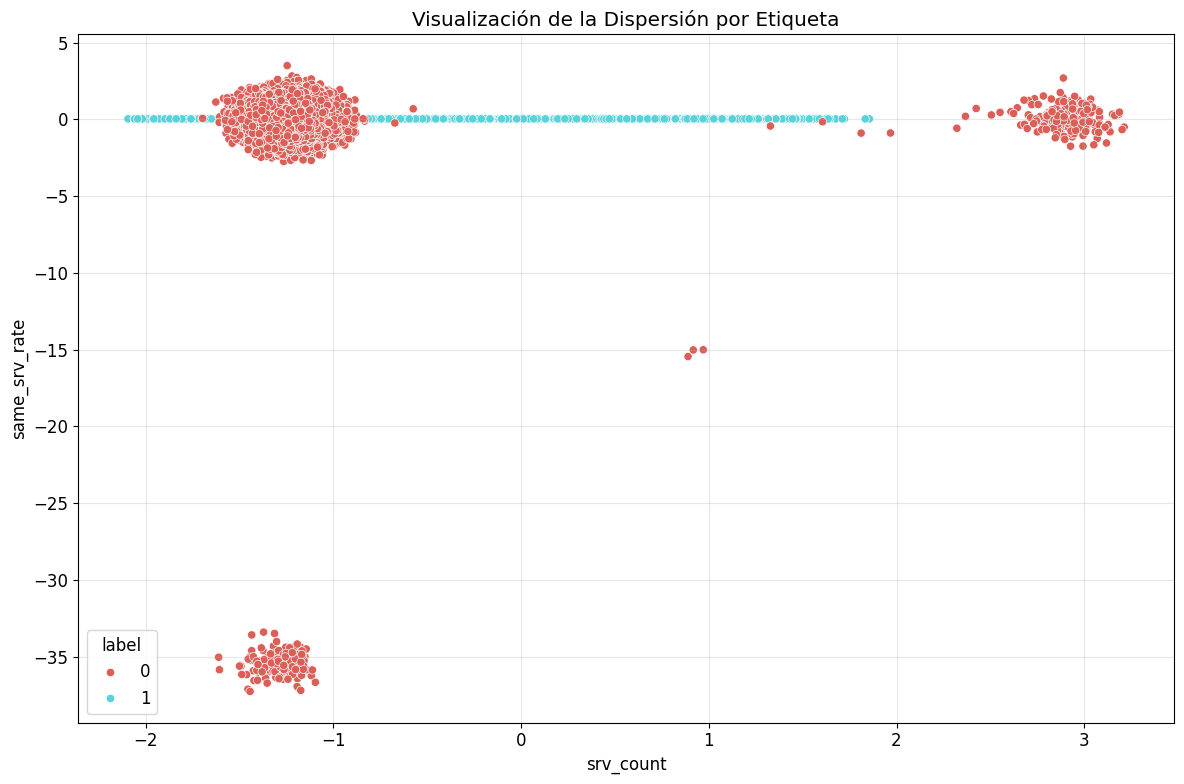

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'data' es tu DataFrame con las características y etiquetas
# Ejemplo de cómo debería estar estructurado:
# data = pd.DataFrame({
#     'feature1': [...],  # Valores numéricos
#     'feature2': [...],  # Valores numéricos
#     'label': [...]      # Etiquetas categóricas
# })
c1 = data.columns[2]  # Primera característica
c2 = data.columns[3]  # Segunda característica

# Gráfico de dispersión mejorado
sns.scatterplot(
    x=c1,  # Primera característica
    y=c2,  # Segunda característica
    hue="label",  # Variable de coloración
    data=data,
    palette="hls",
    legend="full",
)
plt.title("Visualización de la Dispersión por Etiqueta")
plt.xlabel(c1)  # Nombre de la primera característica
plt.ylabel(c2)  # Nombre de la segunda característica
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [71]:
import numpy as np

# Separar features (X) y target (y)
X = data.drop(columns=["label"])
y = data["label"]

# Dividir en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,  # 20% para test
    random_state=42,  # semilla para reproducibilidad
    stratify=y,  # mantiene proporción de clases
)

# Verificación de tamaños
print(f"\nTotal muestras: {len(X)}")
print(f"Train: {len(X_train)} muestras ({len(X_train)/len(X):.0%})")
print(f"Test: {len(X_test)} muestras ({len(X_test)/len(X):.0%})")

# Verificación distribución de clases (si es clasificación)
if len(y.unique()) > 1:
    print("\nDistribución de clases:")
    print(f"Train - {dict(zip(*np.unique(y_train, return_counts=True)))}")
    print(f"Test - {dict(zip(*np.unique(y_test, return_counts=True)))}")


Total muestras: 107633
Train: 86106 muestras (80%)
Test: 21527 muestras (20%)

Distribución de clases:
Train - {np.int64(0): np.int64(42844), np.int64(1): np.int64(43262)}
Test - {np.int64(0): np.int64(10711), np.int64(1): np.int64(10816)}


In [72]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (86106, 6)
X_test shape: (21527, 6)


## Entrenamiento aplicando SUOD para automatizar entrenamientos de varios modelos


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    precision_recall_curve,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    ConfusionMatrixDisplay,
)
from tabulate import tabulate


Distribución total de clases:
{1: 54078, 0: 53555}

División train-test (80-20):
Train - 0: 42844, 1: 43262
Test - 0: 10711, 1: 10816

Entrenando ensemble SUOD...
RandomForestRegressor()
Worker 1 sum of ranks: 2.0
Worker 2 sum of ranks: 3.4000000000000004
Worker 3 sum of ranks: 2.6
Worker 4 sum of ranks: 0.0

Split among workers BPS: [0, 1, 3, 5, 5] [1, 2, 2, 0]
Parallel Training...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    7.7s finished


Balanced Scheduling Total Train Time: 8.881026029586792
Split among workers default: [2 3 4 5] [np.int64(1), np.int64(1), np.int64(1)]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.6s finished



Evaluación de modelos individuales:


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    3.6s remaining:    3.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished



RESUMEN DE MÉTRICAS POR MODELO:
+----------+-----------+-------------+----------+------------+-------------+
| Modelo   |   ROC AUC |   Precision |   Recall |   F1-Score |   Threshold |
+==========+===========+=============+==========+============+=============+
| COPOD    |    0.9735 |      0.9337 |   0.9051 |     0.9192 |     -6.5057 |
+----------+-----------+-------------+----------+------------+-------------+
| LOF      |    0.6098 |      0.5616 |   0.8845 |     0.6870 |     -1.0433 |
+----------+-----------+-------------+----------+------------+-------------+
| CBLOF    |    0.6964 |      0.5895 |   0.8151 |     0.6842 |     -1.0405 |
+----------+-----------+-------------+----------+------------+-------------+
| IForest  |    0.6802 |      0.5025 |   0.9999 |     0.6689 |     -0.1504 |
+----------+-----------+-------------+----------+------------+-------------+
| IForest  |    0.6701 |      0.5026 |   0.9998 |     0.6689 |     -0.1515 |
+----------+-----------+-------------+-----

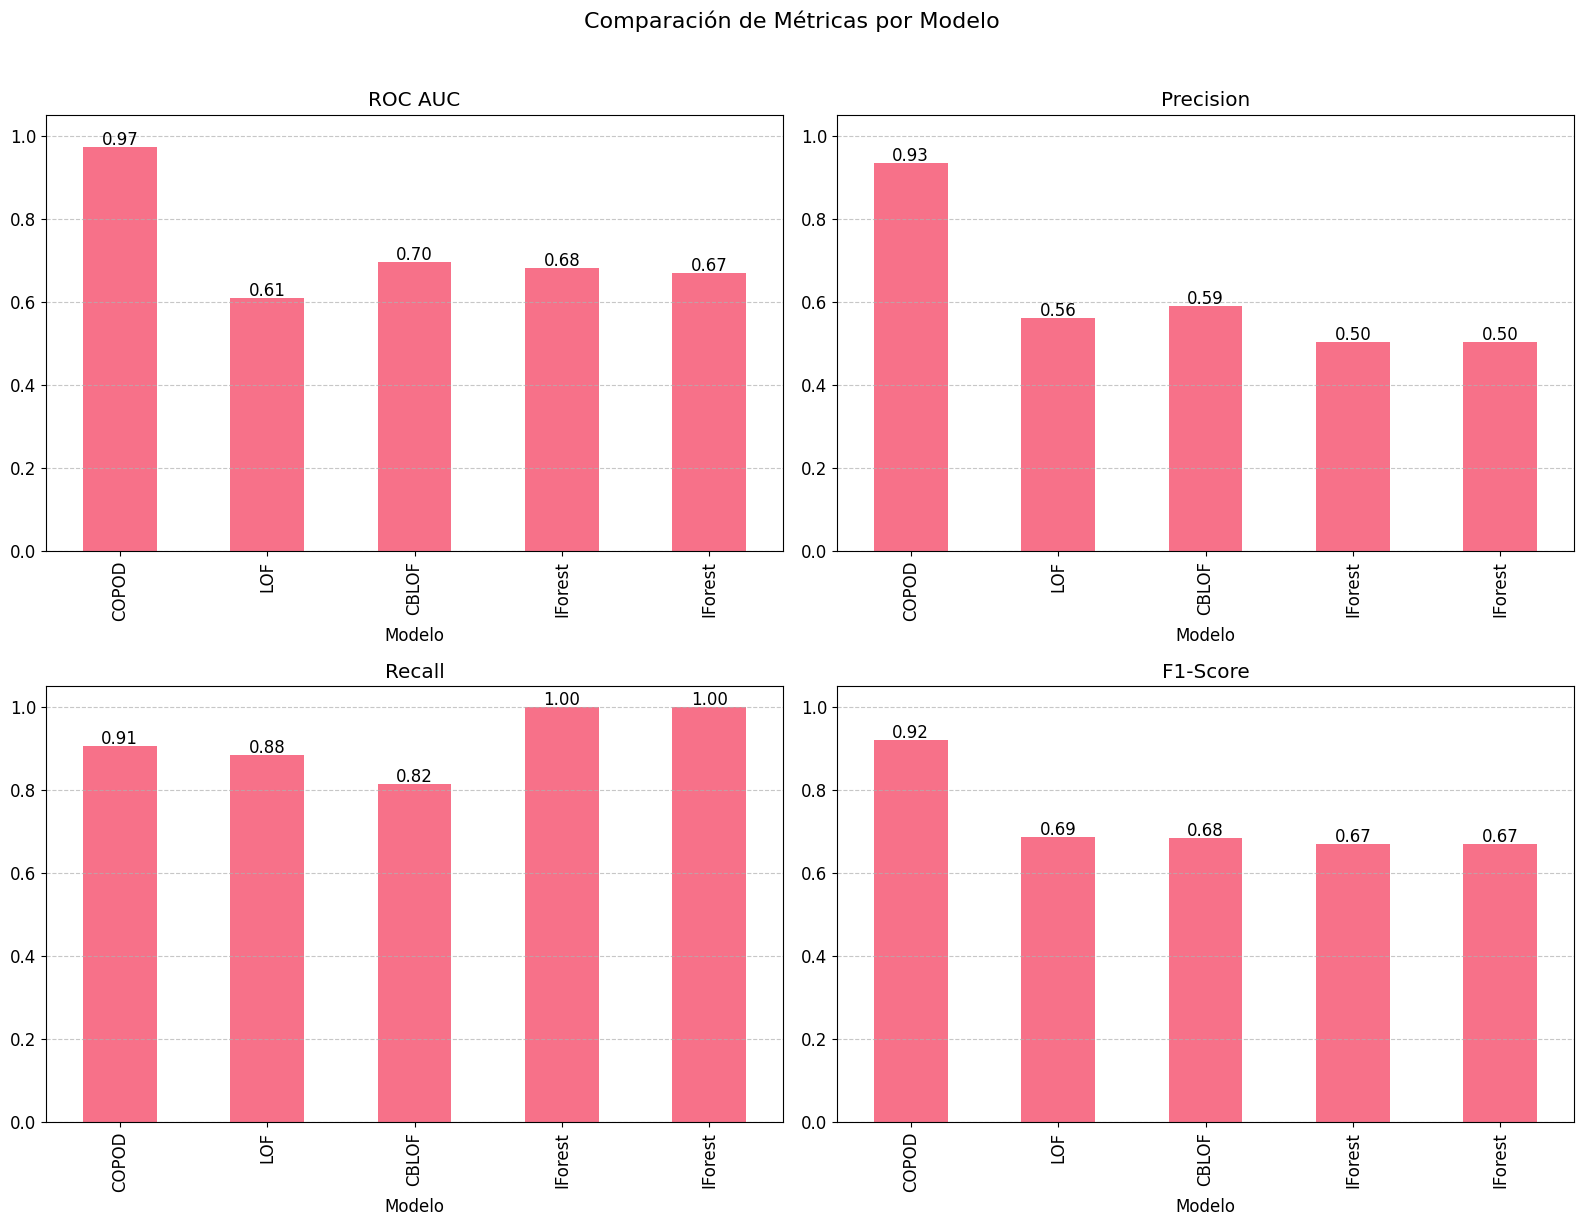


Resumen de métricas individuales:
+----------+-----------+-------------+----------+------------+-------------+
| Modelo   |   ROC AUC |   Precision |   Recall |   F1-Score |   Threshold |
+==========+===========+=============+==========+============+=============+
| COPOD    |     0.974 |       0.934 |    0.905 |      0.919 |      -6.506 |
+----------+-----------+-------------+----------+------------+-------------+
| LOF      |     0.610 |       0.562 |    0.884 |      0.687 |      -1.043 |
+----------+-----------+-------------+----------+------------+-------------+
| CBLOF    |     0.696 |       0.590 |    0.815 |      0.684 |      -1.040 |
+----------+-----------+-------------+----------+------------+-------------+
| IForest  |     0.680 |       0.502 |    1.000 |      0.669 |      -0.150 |
+----------+-----------+-------------+----------+------------+-------------+
| IForest  |     0.670 |       0.503 |    1.000 |      0.669 |      -0.151 |
+----------+-----------+-------------+---

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    5.9s finished


Parallel Score Prediction without Approximators Total Time: 7.0730063915252686

Métricas finales del ensemble:
+-----------+-------------+----------+------------+------------+
|   ROC AUC |   Precision |   Recall |   F1-Score |   AP Score |
+===========+=============+==========+============+============+
|    0.7852 |      0.8712 |   0.6952 |     0.7733 |     0.7909 |
+-----------+-------------+----------+------------+------------+


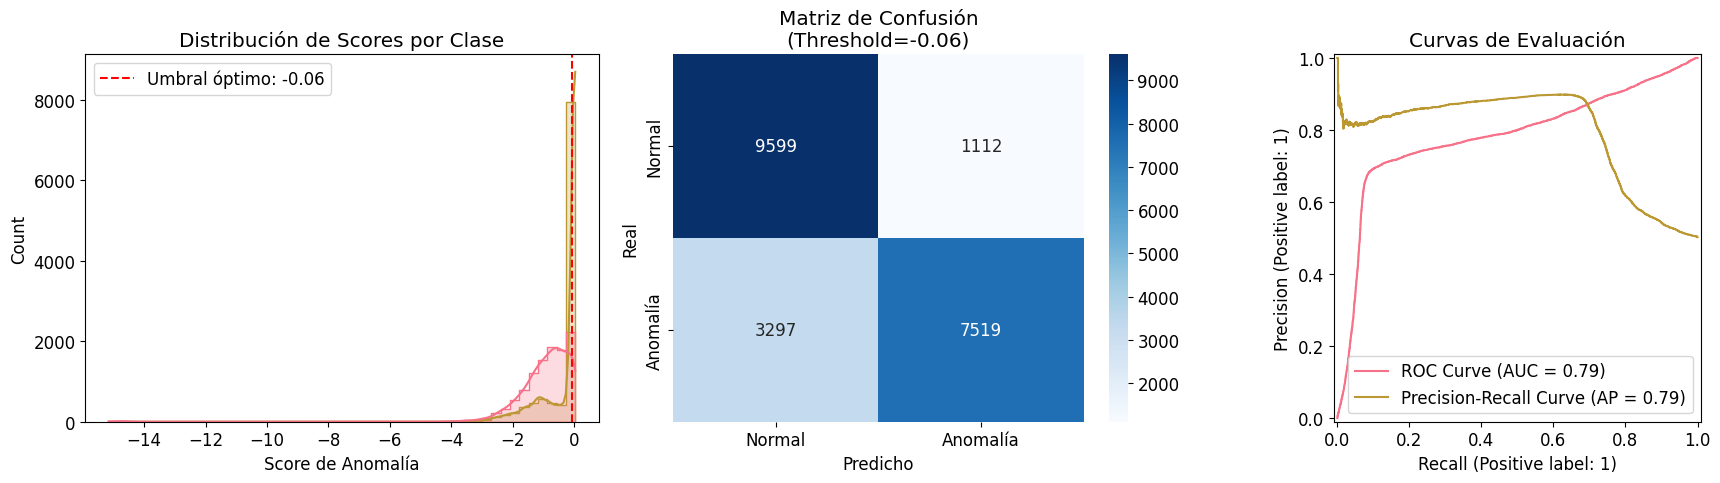


Análisis de errores:
- Falsos negativos: 3297
- Verdaderos positivos: 7519
- Tasa de detección: 69.52%


In [74]:
from pyod.models.lof import LOF
from pyod.models.copod import COPOD
from pyod.models.cblof import CBLOF
from pyod.models.iforest import IForest
from pyod.models.suod import SUOD
from sklearn.base import clone
from pyod.utils.data import evaluate_print
from sklearn.metrics import (
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    precision_recall_curve,
    average_precision_score,
    RocCurveDisplay,
    PrecisionRecallDisplay,
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# 1. Configuración inicial mostrando distribución
print(f"\nDistribución total de clases:\n{y.value_counts().to_dict()}")
print(f"\nDivisión train-test (80-20):")
print(f"Train - 0: {sum(y_train==0)}, 1: {sum(y_train==1)}")
print(f"Test - 0: {sum(y_test==0)}, 1: {sum(y_test==1)}")

# 2. Modelos base reconfigurados para mejor balance
detector_list = [
    COPOD(contamination=0.3, n_jobs=4),  # Ajustado a 30%
    LOF(n_neighbors=50, contamination=0.3, n_jobs=4),  # Vecindario moderado
    CBLOF(n_clusters=8, contamination=0.3, alpha=0.8),  # Menos clusters
    IForest(n_estimators=200, contamination=0.3, random_state=42, n_jobs=4),
    IForest(n_estimators=100, contamination=0.3, random_state=42, n_jobs=4),
]

# 3. Ensemble SUOD optimizado
suod_clf = SUOD(
    base_estimators=detector_list,
    n_jobs=4,
    combination="max",
    contamination=0.3,  # Contaminación más realista
    rp_flag_global=X_train.shape[1] > 30,
    bps_flag=True,
    approx_flag_global=False,  # Máxima precisión
    verbose=2,
)

# 4. Entrenamiento con monitoreo
print("\nEntrenando ensemble SUOD...")
suod_clf.fit(X_train)

# 5. Evaluación de modelos base con visualización
print("\nEvaluación de modelos individuales:")
## Configuración de estilos para los gráficos
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["font.size"] = 12

# Lista para almacenar métricas de todos los modelos
performance_data = []

# Crear figura principal para las curvas ROC y Precision-Recall
fig_curves, axs_curves = plt.subplots(2, 3, figsize=(20, 12))
fig_curves.suptitle("Curvas ROC y Precision-Recall por Modelo", fontsize=16, y=1.02)

for i, model in enumerate(detector_list):
    try:
        model_clone = clone(model)
        model_clone.fit(X_train)
        scores = model_clone.decision_function(X_test)

        # Invertir scores si es necesario (AUC < 0.5)
        if roc_auc_score(y_test, scores) < 0.5:
            scores = -scores

        # Umbral óptimo basado en F1
        precisions, recalls, thresholds = precision_recall_curve(y_test, scores)
        f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-12)
        optimal_idx = np.argmax(f1_scores)
        optimal_threshold = thresholds[optimal_idx]
        y_pred = (scores > optimal_threshold).astype(int)

        # Métricas
        auc = roc_auc_score(y_test, scores)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Gráfico de curvas ROC y Precision-Recall
        plt.subplot(2, 3, i + 1)
        RocCurveDisplay.from_predictions(
            y_test, scores, name=f"{model.__class__.__name__}", ax=plt.gca()
        )
        PrecisionRecallDisplay.from_predictions(y_test, scores, ax=plt.gca())
        plt.title(f"{model.__class__.__name__}\nAUC: {auc:.2f}, F1: {f1:.2f}")

        performance_data.append(
            {
                "Modelo": model.__class__.__name__,
                "ROC AUC": f"{auc:.4f}",
                "Precision": f"{precision:.4f}",
                "Recall": f"{recall:.4f}",
                "F1-Score": f"{f1:.4f}",
                "Threshold": f"{optimal_threshold:.4f}",
            }
        )

        # 1. Gráfico de curvas ROC y Precision-Recall
        ax = axs_curves[i // 3, i % 3]
        RocCurveDisplay.from_predictions(y_test, scores, name="ROC", ax=ax)
        PrecisionRecallDisplay.from_predictions(
            y_test, scores, name="Precision-Recall", ax=ax
        )
        ax.set_title(f"{model.__class__.__name__}\nAUC: {auc:.2f}, F1: {f1:.2f}")
        ax.legend(loc="lower right")

        # 2. Matriz de Confusión
        fig_cm, ax_cm = plt.subplots(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(
            confusion_matrix=cm, display_labels=["Normal", "Anomalía"]
        )
        disp.plot(cmap="Blues", ax=ax_cm, values_format="d")
        ax_cm.set_title(
            f"Matriz de Confusión - {model.__class__.__name__}\nThreshold: {optimal_threshold:.2f}"
        )
        plt.tight_layout()
        plt.savefig(
            f"confusion_matrix_{model.__class__.__name__}.png",
            dpi=300,
            bbox_inches="tight",
        )
        plt.close(fig_cm)

        # 3. Distribución de Scores
        fig_dist, ax_dist = plt.subplots(figsize=(10, 6))
        sns.histplot(
            x=scores, hue=y_test, bins=50, kde=True, element="step", ax=ax_dist
        )
        ax_dist.axvline(
            x=optimal_threshold,
            color="r",
            linestyle="--",
            label=f"Umbral: {optimal_threshold:.2f}",
        )
        ax_dist.set_title(f"Distribución de Scores - {model.__class__.__name__}")
        ax_dist.set_xlabel("Score de Anomalía")
        ax_dist.legend()
        plt.tight_layout()
        plt.savefig(
            f"score_distribution_{model.__class__.__name__}.png",
            dpi=300,
            bbox_inches="tight",
        )
        plt.close(fig_dist)

    except Exception as e:
        print(f"Error evaluando {model.__class__.__name__}: {str(e)}")

# Ajustar y guardar gráfico de curvas
plt.tight_layout()
plt.savefig("model_comparison_curves.png", dpi=300, bbox_inches="tight")
plt.close(fig_curves)

# Mostrar tabla resumen de métricas
print("\nRESUMEN DE MÉTRICAS POR MODELO:")
print(tabulate(performance_data, headers="keys", tablefmt="grid", floatfmt=".4f"))

# Gráfico comparativo de métricas
if performance_data:
    metrics_df = pd.DataFrame(performance_data).set_index("Modelo")
    metrics_to_plot = ["ROC AUC", "Precision", "Recall", "F1-Score"]

    fig_metrics, axs_metrics = plt.subplots(2, 2, figsize=(16, 12))
    for i, metric in enumerate(metrics_to_plot):
        ax = axs_metrics[i // 2, i % 2]
        metrics_df[metric].astype(float).plot(kind="bar", ax=ax)
        ax.set_title(metric)
        ax.set_ylim(0, 1.05)
        ax.grid(True, axis="y", linestyle="--", alpha=0.7)

        # Añadir valores en las barras
        for p in ax.patches:
            ax.annotate(
                f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2.0, p.get_height()),
                ha="center",
                va="center",
                xytext=(0, 5),
                textcoords="offset points",
            )

    plt.suptitle("Comparación de Métricas por Modelo", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.savefig("metrics_comparison.png", dpi=300, bbox_inches="tight")
    plt.show()

# Mostrar tabla comparativa
print("\nResumen de métricas individuales:")
print(tabulate(performance_data, headers="keys", tablefmt="grid", floatfmt=".3f"))

# 6. Evaluación del ensemble con visualizaciones
print("\nEvaluación del Ensemble SUOD:")
ensemble_scores = suod_clf.decision_function(X_test)

# Invertir scores si es necesario
if roc_auc_score(y_test, ensemble_scores) < 0.5:
    ensemble_scores = -ensemble_scores

# Umbral óptimo para el ensemble
precisions, recalls, thresholds = precision_recall_curve(y_test, ensemble_scores)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-12)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
ensemble_pred = (ensemble_scores > optimal_threshold).astype(int)

# Métricas finales
final_metrics = {
    "ROC AUC": roc_auc_score(y_test, ensemble_scores),
    "Precision": precision_score(y_test, ensemble_pred),
    "Recall": recall_score(y_test, ensemble_pred),
    "F1-Score": f1_score(y_test, ensemble_pred),
    "AP Score": average_precision_score(y_test, ensemble_scores),
}

print("\nMétricas finales del ensemble:")
print(tabulate([final_metrics], headers="keys", tablefmt="grid", floatfmt=".4f"))

# Visualización completa del ensemble
plt.figure(figsize=(18, 5))

# 1. Distribución de scores
plt.subplot(1, 3, 1)
sns.histplot(x=ensemble_scores, hue=y_test, bins=50, kde=True, element="step")
plt.axvline(
    x=optimal_threshold,
    color="r",
    linestyle="--",
    label=f"Umbral óptimo: {optimal_threshold:.2f}",
)
plt.title("Distribución de Scores por Clase")
plt.xlabel("Score de Anomalía")
plt.legend()

# 2. Matriz de confusión
plt.subplot(1, 3, 2)
cm = confusion_matrix(y_test, ensemble_pred)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Normal", "Anomalía"],
    yticklabels=["Normal", "Anomalía"],
)
plt.title(f"Matriz de Confusión\n(Threshold={optimal_threshold:.2f})")
plt.ylabel("Real")
plt.xlabel("Predicho")

# 3. Curvas ROC y Precision-Recall
plt.subplot(1, 3, 3)
RocCurveDisplay.from_predictions(
    y_test, ensemble_scores, name="ROC Curve", ax=plt.gca()
)
PrecisionRecallDisplay.from_predictions(
    y_test, ensemble_scores, name="Precision-Recall Curve", ax=plt.gca()
)
plt.title("Curvas de Evaluación")
plt.legend()

plt.tight_layout()
plt.show()

# 7. Análisis de falsos negativos (opcional)
if sum(ensemble_pred) > 0:
    false_negatives = X_test[(y_test == 1) & (ensemble_pred == 0)]
    true_positives = X_test[(y_test == 1) & (ensemble_pred == 1)]

    print(f"\nAnálisis de errores:")
    print(f"- Falsos negativos: {len(false_negatives)}")
    print(f"- Verdaderos positivos: {len(true_positives)}")
    print(
        f"- Tasa de detección: {len(true_positives)/(len(true_positives)+len(false_negatives)):.2%}"
    )